<a href="https://colab.research.google.com/github/Ira1729/first-commit/blob/master/Image_classification(CIFAR_10).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IMAGE CLASSIFICATION USING CIFAR-10 DATASET**

In [12]:
import tensorflow as tf
# import tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [13]:
(X_train, y_train),(X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [14]:
X_test.shape

(10000, 32, 32, 3)

In [15]:
y_train[:5] #it's giving a 2-D array we dont need a 2-d array, we dont need 2d

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [16]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [17]:
classes = ["airplane","automobile","bird","cat","deer","frog","horse","ship","truck"]

In [18]:
def plot_sample(X,y,index):
  plt.figure(figsize = (15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])


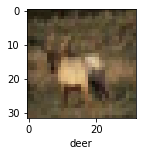

In [19]:
# for i in range(8):
plot_sample(X_train,y_train,3)
   

Normalize the data

In [20]:
X_train = X_train /255
X_test = X_test /255

# IC through ANNs

Model building

In [21]:
ann = models.Sequential([
    layers.Flatten(input_shape = (32,32,3)),
    layers.Dense(3000,activation = 'relu'),
    layers.Dense(1000,activation = 'relu'),
    layers.Dense(10, activation = 'sigmoid')
])
ann.compile(optimizer = 'SGD',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 151s 96ms/step - loss: 1.8094 - accuracy: 0.3568
Epoch 2/5
1563/1563 [==============================] - 144s 92ms/step - loss: 1.6215 - accuracy: 0.4283
Epoch 3/5
1563/1563 [==============================] - 139s 89ms/step - loss: 1.5396 - accuracy: 0.4563
Epoch 4/5
1563/1563 [==============================] - 134s 86ms/step - loss: 1.4775 - accuracy: 0.4798
Epoch 5/5
1563/1563 [==============================] - 137s 88ms/step - loss: 1.4334 - accuracy: 0.4980


In [23]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size = (3,3), activation = 'relu', input_shape = (32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64,kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64,activation = 'relu'),
    layers.Dense(10, activation = 'softmax')
])

In [24]:
cnn.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [25]:
cnn.fit(X_train, y_train, epochs = 10)

Epoch 1/10
1563/1563 [==============================] - 69s 44ms/step - loss: 1.4444 - accuracy: 0.4819
Epoch 2/10
1563/1563 [==============================] - 65s 42ms/step - loss: 1.1014 - accuracy: 0.6139
Epoch 3/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.9764 - accuracy: 0.6607
Epoch 4/10
1563/1563 [==============================] - 65s 41ms/step - loss: 0.8917 - accuracy: 0.6908
Epoch 5/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.8246 - accuracy: 0.7119
Epoch 6/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.7644 - accuracy: 0.7358
Epoch 7/10
1563/1563 [==============================] - 65s 41ms/step - loss: 0.7089 - accuracy: 0.7536
Epoch 8/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.6654 - accuracy: 0.7682
Epoch 9/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.6242 - accuracy: 0.7818
Epoch 10/10
1563/1563 [==============================] - 65s 41m

In [26]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 4s 12ms/step - loss: 1.0199 - accuracy: 0.6836


[1.0199354887008667, 0.6836000084877014]

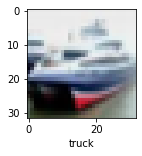

In [27]:
y_test = y_test.reshape(-1,)
y_test[:5]
plot_sample(X_test, y_test, 1)

In [29]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 4s 12ms/step


array([[1.94736756e-04, 2.21486844e-04, 1.59929190e-02, 8.34462166e-01,
        5.80283631e-06, 1.16958944e-02, 8.36470798e-02, 8.86539397e-07,
        5.37784919e-02, 4.78630795e-07],
       [1.09329390e-04, 1.14041679e-01, 1.39691521e-08, 1.85367743e-09,
        1.63235106e-10, 1.11488353e-10, 3.36757378e-09, 1.33154356e-11,
        8.85753155e-01, 9.58127494e-05],
       [1.37490146e-02, 6.26930833e-01, 4.57628958e-05, 2.45256870e-05,
        5.87643117e-05, 3.04212767e-06, 3.18505909e-06, 2.68934741e-06,
        3.57201487e-01, 1.98072963e-03],
       [7.62527347e-01, 1.55136302e-01, 4.34927270e-03, 1.44210426e-04,
        1.89686529e-04, 5.17465560e-05, 1.15311414e-05, 6.85081795e-06,
        7.74836466e-02, 9.94231959e-05],
       [4.31329624e-07, 6.98826392e-04, 5.09900637e-02, 1.01752318e-02,
        1.24117613e-01, 7.13604095e-04, 8.13151479e-01, 3.57663254e-07,
        1.49209824e-04, 3.20534377e-06]], dtype=float32)

In [30]:
y_classes = [np.argmax(y_pred[0]) for element in y_pred]
y_classes[:5]

[3, 3, 3, 3, 3]

In [ ]:
plot_sample(X_test, y_test, 3)

In [ ]:
classes[y_classes[1]]